# THE FINAL PROJECT!!!! 
#### (due Dec. 16th)
## Step one: duplicate this notebook and set the sharing settings to anyone with the link can comment!

#### For part 1 of this project, we will analyze and plot data to tell the story of Covid-19 within the US, first at the level of states (California and New York), and then at the level of counties (your county!). You will find instructions for each part below.

In [ ]:
# Loading modules - see the help page to see which modules you should load and how!!!

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from scipy.stats import linregress
colors= sns.color_palette ('colorblind')



## Loading data

In [ ]:
# loading data (filled in for you!):

# From Our World in Data
world_vax = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv', parse_dates=['date'])
us_vax = world_vax[world_vax['location']=='United States']
state_vax = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv', parse_dates=['date'])

# From the LA Times
county_vax = pd.read_csv('https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/cdph-vaccination-county-totals.csv', parse_dates=['date'])

# From the New York Times 
us_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us.csv', parse_dates=['date'])
state_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-states.csv', parse_dates=['date'])
county_data_2020 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties-2020.csv', parse_dates=["date"])
county_data_2021 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties-2021.csv', parse_dates=["date"])
county_data = pd.concat([county_data_2020, county_data_2021]) # making one big file for county data


## 1a) Plotting state data
*  Use `state_data.head(3)` to take a peek at the rolling average data for US states. 
* Using this data, plot the number of deaths per 100 thousand people due to Covid-19 over time in New York and California·       
* Plot both New York and California on the same plot, in different colors (see screenshots with plotting tips on the help page)
* Before plotting each state, you will need to make a new dataframe that is the subset of the state data that only contains entries for that state (see filtering/subsetting tips on the help page)·       
* Include a legend     
* Label the y-axis

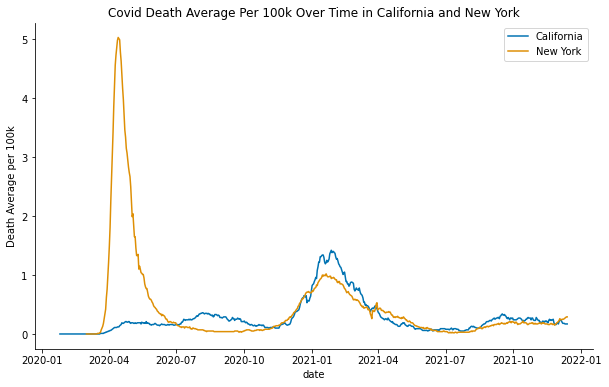

In [ ]:
# the line below set the size and grid for our graphs
fig, sub = plt.subplots(1,1, figsize=(10,6))

# the lines below set the titles for our plot and the x y labels
sub.set_ylabel('Death Average per 100k')
sub.set_xlabel('date')
plt.title('Covid Death Average Per 100k Over Time in California and New York')

i= 0

# for-loop loops through california and new york and plots them on one graph
for state in ['California', 'New York']:
    #subsets the state data and filters it by the given sstate in the incrementing for loop
    st = state_data[state_data['state']==state]
    # plots the subset of data comparing average deaths per 100k over time and seperated the states by color 
    sub.plot(st['date'], st['deaths_avg_per_100k'], label=state, color=colors[i])
    # increments i in order to change colors
    i+=1

# creates a legend for the states that are being compared
sub.legend()
# makes the graph asthetically pleasing
sns.despine()

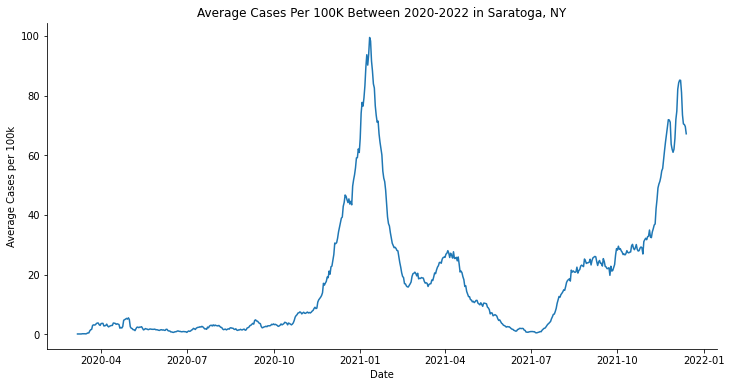

In [ ]:
# subsets saratoga county out of county_data
Saratoga_county_data= county_data[county_data['county']== 'Saratoga']


fig, sub = plt.subplots(1, 1, figsize=(12, 6))

# plots saratoga county comparing average cases per 100k over time 
sub.plot(Saratoga_county_data['date'], Saratoga_county_data['cases_avg_per_100k'])

# sets x and y labels and title for plots
sub.set_ylabel('Average Cases per 100k')
sub.set_xlabel('Date')
plt.title('Average Cases Per 100K Between 2020-2022 in Saratoga, NY')

sns.despine()


## 1b) Measuring R at three time intervals in New York and California
* March 14 - April 1st, 2020
* November 20th - December 20th, 2020
* February 1st - March 1st, 2021

1. Make a new column in your dataframe for the day number (an integer) by subtracting the datetime for the start of 2020 and then using .dt.days on the result (see help page for a walkthrough on this part)
2. Make a new column in your dataframe for log(deaths) by using `np.log` on the deaths_ave column
3. Write a function that:
    * Filters the dataframe based on the state and a time range (start date and end date)
    * Does a linear regression to find the exponential growth rate r (regress your day number column (x) against log deaths (y), r is the slope)
    * Returns an estimate of R, where R is equal to the exponentiation of the exponential growth rate r multiplied by the generation time, which we'll estimate as 5 days. $R=e^{5r}$
4.	Call your function for each of the 3 timeframes in each of the two states
    * Optionally you can also plot log_deaths against day_index in your function in order to graphically see the trends, and see whether these periods have a roughly linear change in log_deaths over time.


/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1.9732991222325476

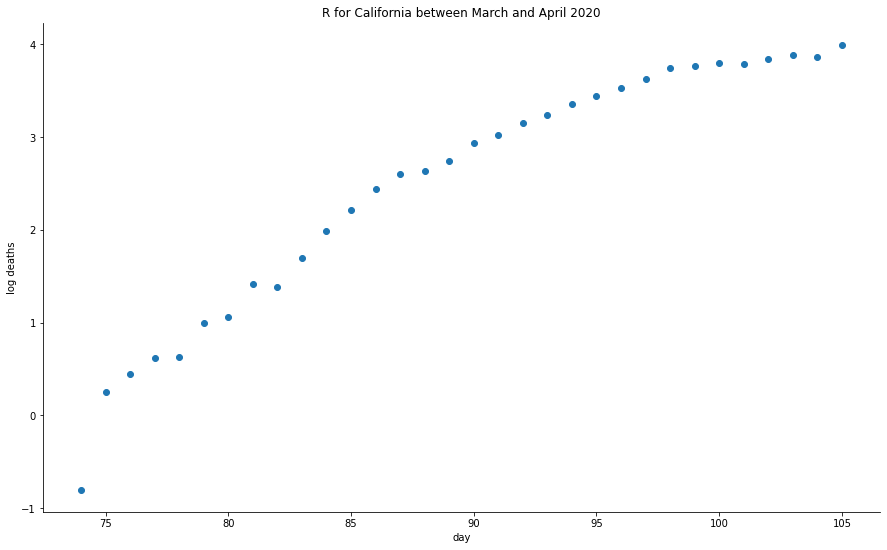

In [ ]:
California_data= state_data[state_data['state']== 'California']

state_data['day_index'] = (state_data['date']-dt.datetime(2020, 1, 1)).dt.days
state_data['log_deaths'] = np.log(state_data['deaths_avg'])
#above step adds a new column called day_index to state_data dataframe, so that later we can plot log deaths vs day
#day_index not previously a parameter in original dataset

def get_r_state(state, start_date, end_date):
    ''' This function calculates an R value based on state data. It includes the filtering step to filter state data between specific given timepoints that we input. It also generates a labeled graph of log deaths vs day.
    '''
    
    filtered_by_s = state_data[state_data['state']== state]
    filtered_by_d = filtered_by_s[(filtered_by_s['date']>= start_date) & (filtered_by_s['date']<= end_date)] 
    #filtering step above that filters data based on two given timepoints we input

    fig, sub =  plt.subplots(1,1, figsize=(15,9), sharex=True)
    lr = linregress(filtered_by_d['day_index'], filtered_by_d['log_deaths'])
    plt.scatter(filtered_by_d['day_index'], filtered_by_d['log_deaths'])
    sub.set_xlabel('day')
    sub.set_ylabel('log deaths')
    sns.despine()
    return np.exp(lr[0]*5)
    #rest of function is about plotting state data of log deaths vs. day

CAR1= get_r_state('California', dt.datetime(2020, 3, 15), dt.datetime(2020, 4, 15)) #applying function to data of specific time period of 3/15/20-4/15/20
plt.title('R for California between March and April 2020')
CAR1

1.2930863356846372

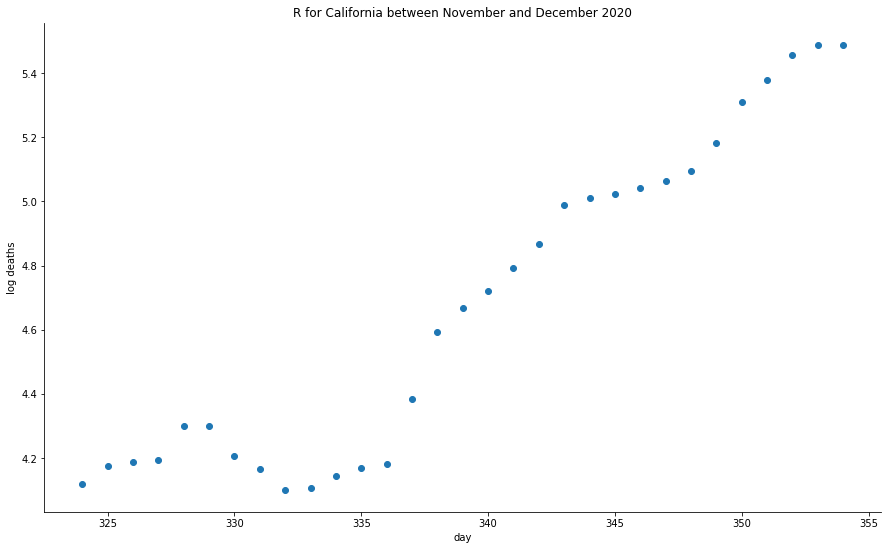

In [ ]:
CAR2= get_r_state('California', dt.datetime(2020, 11, 20), dt.datetime(2020, 12, 20))
plt.title('R for California between November and December 2020')
CAR2

0.9009879243869238

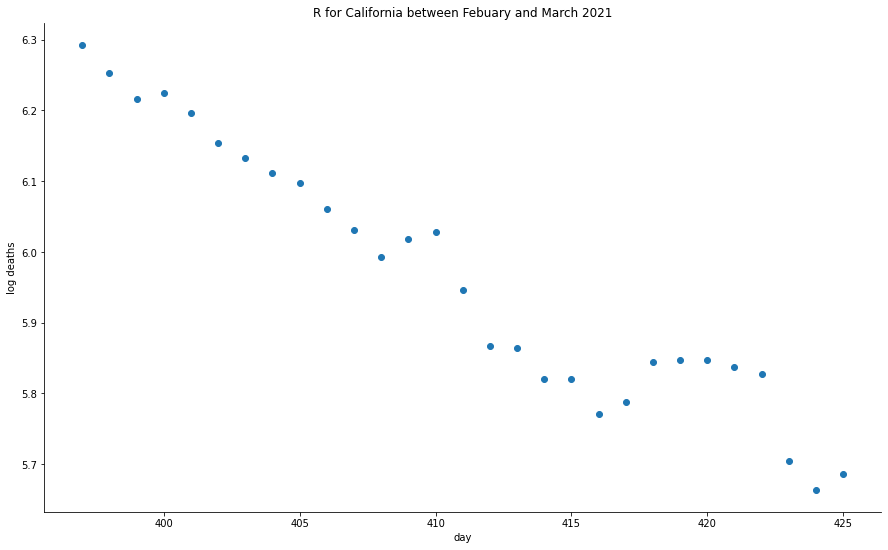

In [ ]:
CAR3=get_r_state('California', dt.datetime(2021, 2, 1), dt.datetime(2021, 3, 1))
plt.title('R for California between Febuary and March 2021')
CAR3

3.204598014663548

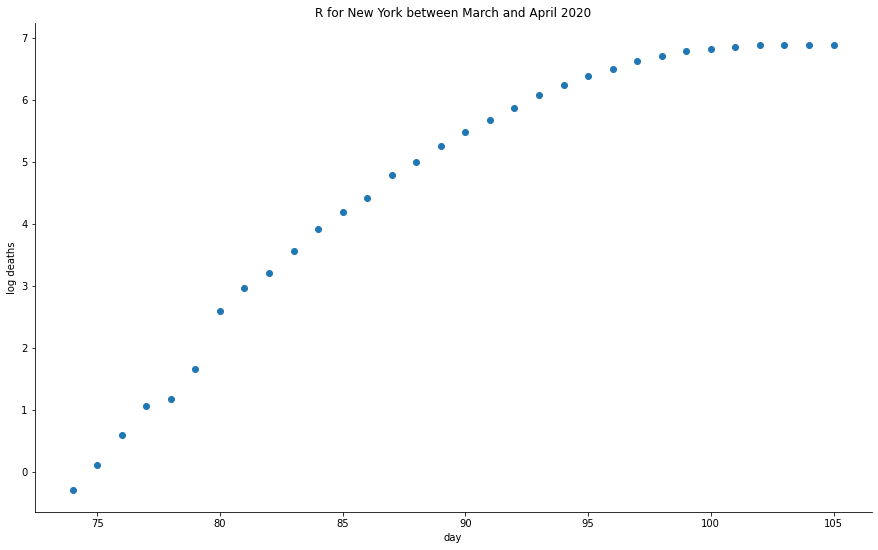

In [ ]:
NYR1 = get_r_state('New York', dt.datetime(2020, 3, 15), dt.datetime(2020, 4, 15))
plt.title('R for New York between March and April 2020')
NYR1

1.2392934214696347

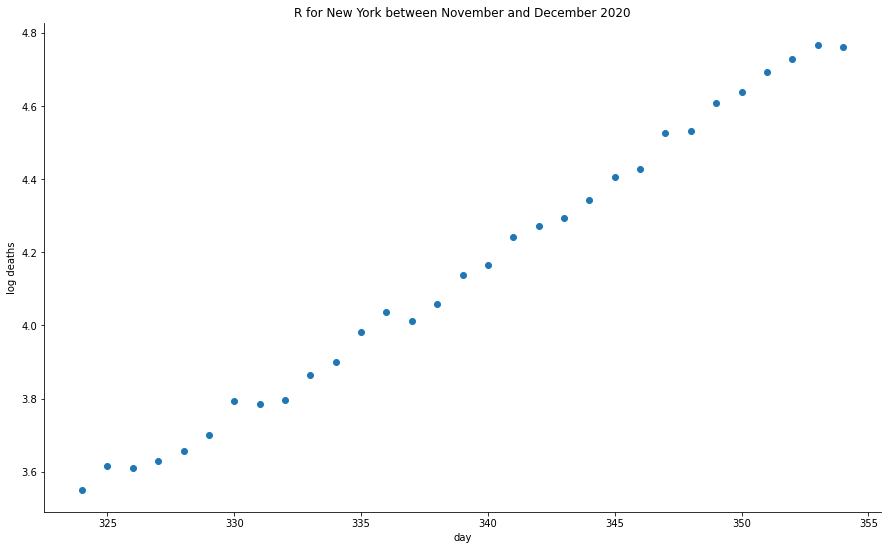

In [ ]:
NYR2= get_r_state('New York', dt.datetime(2020, 11, 20), dt.datetime(2020, 12, 20))
plt.title('R for New York between November and December 2020')
NYR2

0.9125593295798026

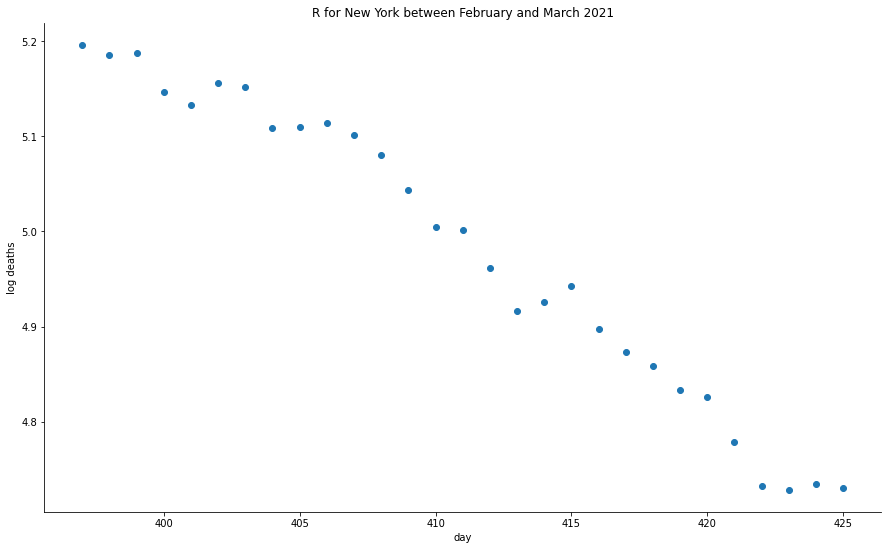

In [ ]:
NYR3= get_r_state('New York', dt.datetime(2021, 2, 1), dt.datetime(2021, 3, 1))
plt.title('R for New York between February and March 2021')
NYR3

In [ ]:
California_data


,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
7,2020-01-25,USA-06,California,1,0.14,0.00,0,0.00,0.00
10,2020-01-26,USA-06,California,1,0.29,0.00,0,0.00,0.00
14,2020-01-27,USA-06,California,0,0.29,0.00,0,0.00,0.00
18,2020-01-28,USA-06,California,0,0.29,0.00,0,0.00,0.00
22,2020-01-29,USA-06,California,0,0.29,0.00,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...
35673,2021-12-09,USA-06,California,7661,7016.57,17.76,95,70.00,0.18
35729,2021-12-10,USA-06,California,6580,6848.71,17.33,71,65.43,0.17
35785,2021-12-11,USA-06,California,1809,6780.00,17.16,23,66.00,0.17
35841,2021-12-12,USA-06,California,1471,6756.43,17.10,9,67.00,0.17


## 1c) Telling the story of coronavirus in your county
1.	Make a plot like the one at the top of these instruction document, but for your county instead of the whole country
    * take a look at the county data by running `county_data.head(3)`
    * Make a subset of that dataframe that is only data for California
    * Make a subset of that dataframe that is only data for your county
    * Plot cases_avg and deaths_avg (these are rolling averages) over time on two subplots of a figure
    * Use “sharex=True” when making your subplots to make the x-axis the same between plots 
    * Load the county vaccination data from the LA Times
    * Make a subset of that dataframe that is only data for your county
    * Plot fully_vaccinated_percent over time on a third subplot of your figure
    * Label your axes where appropriate
2.	Choose at least one of the following to do:
    * Make a similar plot for another 2-3 counties near your county so you can compare and contrast the dynamics of cases, deaths, and vaccinations
    * Measure R at a few time intervals for your county. Compare and contrast your results with your results for New York and California above. Make sure to check that your data for the time intervals isn’t too noisy – it’s possible for little fluctuations to affect the slope of log_deaths vs. time if the counts are low.
    * Do some research to add some human aspect to the story of Covid-19 in your county, and annotate your plot (either in pyplot or on another image editing program). One example of an annotation you could add is when lockdowns or mask mandates began or ended, but you could also mark more specific events, like specific people who are important to the community or to you getting sick or vaccinated. 


In [ ]:
ccc_vax_data = county_vax[county_vax['county'] == 'Contra Costa']

#We switched from Saratoga County to Contra Costa County, because there was no further data in the datasets you provided us for Saratoga.
#Also, it was a nice way to incorporate data from both our hometowns!

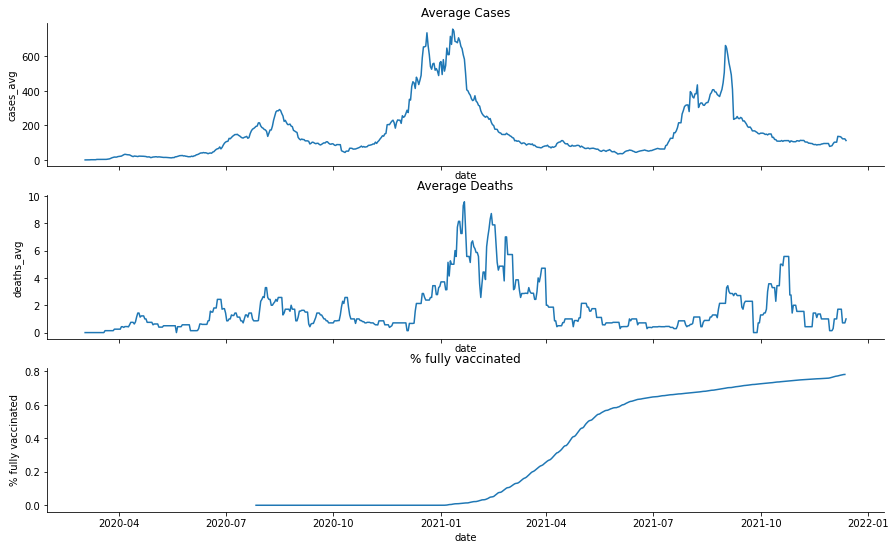

In [ ]:
fig, sub = plt.subplots(3,1, figsize=(15,9), sharex=True)

# subsets data from diferent sources to get average cases, average deaths, and percent vacinated over time 
ccc_vax_data = county_vax[county_vax['county'] == 'Contra Costa']

California_data= county_data[county_data['state']== 'California']

ccc_cases_deaths_data = California_data[California_data['county']== 'Contra Costa']

# creates individual plots along the same x axis, date.
sub[0].plot(ccc_cases_deaths_data['date'], ccc_cases_deaths_data['cases_avg'])
sub[0].set_ylabel('cases_avg')
sub[0].set_xlabel('date')
sub[0].title.set_text('Average Cases')

sub[1].plot(ccc_cases_deaths_data['date'], ccc_cases_deaths_data['deaths_avg'])
sub[1].set_ylabel('deaths_avg')
sub[1].set_xlabel('date')
sub[1].title.set_text('Average Deaths')

sub[2].plot(ccc_vax_data['date'], ccc_vax_data['fully_vaccinated_percent'])
sub[2].set_ylabel('% fully vaccinated')
sub[2].set_xlabel('date')
sub[2].title.set_text('% fully vaccinated')

sns.despine()

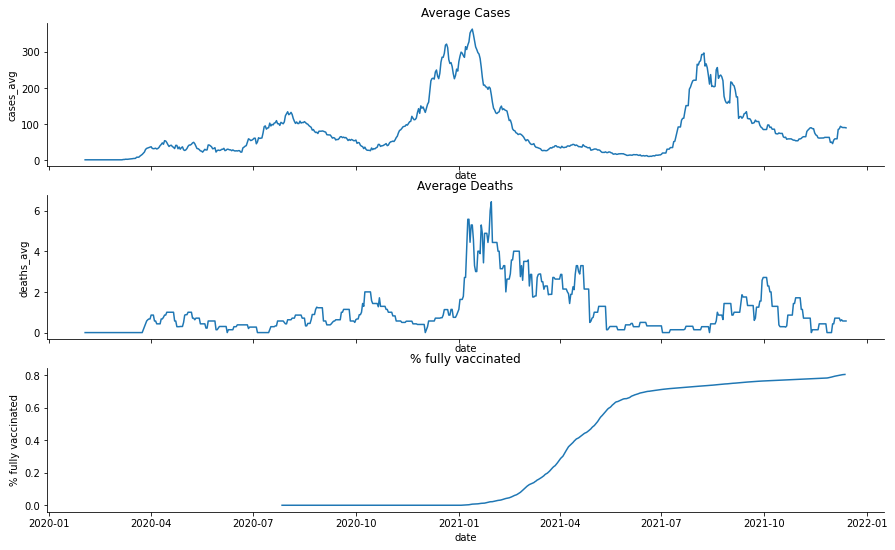

In [ ]:
fig, sub = plt.subplots(3,1, figsize=(15,9), sharex=True)

SF_vax_data = county_vax[county_vax['county'] == 'San Francisco']

California_data= county_data[county_data['state']== 'California']

SF_cases_deaths_data = California_data[California_data['county']== 'San Francisco']


sub[0].plot(SF_cases_deaths_data['date'], SF_cases_deaths_data['cases_avg'])
sub[0].set_ylabel('cases_avg')
sub[0].set_xlabel('date')
sub[0].title.set_text('Average Cases')

sub[1].plot(SF_cases_deaths_data['date'], SF_cases_deaths_data['deaths_avg'])
sub[1].set_ylabel('deaths_avg')
sub[1].set_xlabel('date')
sub[1].title.set_text('Average Deaths')

sub[2].plot(SF_vax_data['date'], SF_vax_data['fully_vaccinated_percent'])
sub[2].set_ylabel('% fully vaccinated')
sub[2].set_xlabel('date')
sub[2].title.set_text('% fully vaccinated')

sns.despine()

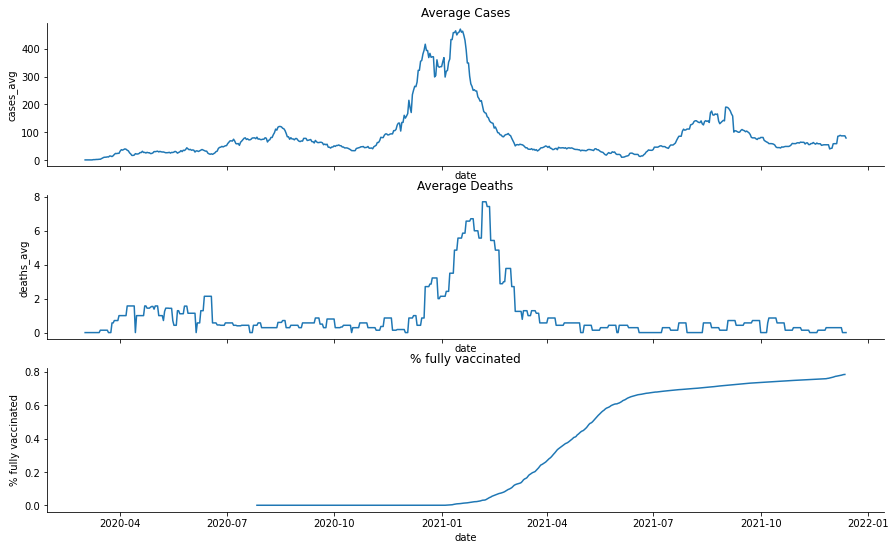

In [ ]:
fig, sub = plt.subplots(3,1, figsize=(15,9), sharex=True)

SM_vax_data = county_vax[county_vax['county'] == 'San Mateo']

California_data= county_data[county_data['state']== 'California']

SM_cases_deaths_data = California_data[California_data['county']== 'San Mateo']


sub[0].plot(SM_cases_deaths_data['date'], SM_cases_deaths_data['cases_avg'])
sub[0].set_ylabel('cases_avg')
sub[0].set_xlabel('date')
sub[0].title.set_text('Average Cases')

sub[1].plot(SM_cases_deaths_data['date'], SM_cases_deaths_data['deaths_avg'])
sub[1].set_ylabel('deaths_avg')
sub[1].set_xlabel('date')
sub[1].title.set_text('Average Deaths')

sub[2].plot(SM_vax_data['date'], SM_vax_data['fully_vaccinated_percent'])
sub[2].set_ylabel('% fully vaccinated')
sub[2].set_xlabel('date')
sub[2].title.set_text('% fully vaccinated')

sns.despine()

In [ ]:
county_data

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53061,Snohomish,Washington,1,0.14,0.02,0,0.00,0.00
1,2020-01-22,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00
2,2020-01-23,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00
3,2020-01-24,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00
4,2020-01-24,USA-17031,Cook,Illinois,1,0.14,0.00,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1129920,2021-12-13,USA-69120,Tinian,Northern Mariana Islands,0,0.00,0.00,0,0.00,0.00
1129921,2021-12-13,USA-69110,Saipan,Northern Mariana Islands,0,0.00,0.00,0,0.00,0.00
1129922,2021-12-13,USA-78030,St. Thomas,Virgin Islands,11,2.86,5.53,0,0.00,0.00
1129923,2021-12-13,USA-78020,St. John,Virgin Islands,1,0.18,4.36,0,0.00,0.00


/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/lib/function_base.py:2474: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


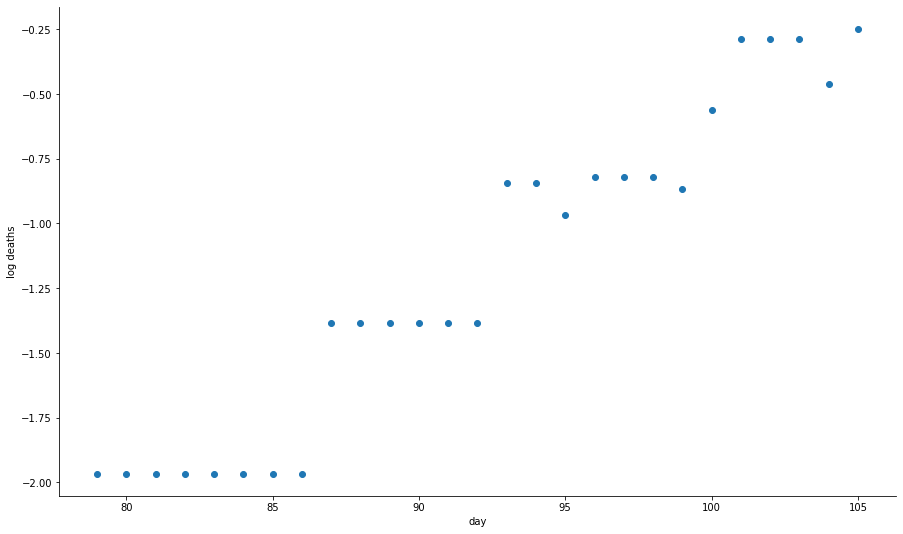

In [ ]:
county_data['day_index'] = (county_data['date']-dt.datetime(2020, 1, 1)).dt.days
county_data['log_deaths'] = np.log(county_data['deaths_avg'])
def get_r_county(county, start_date, end_date):
    '''This function calculates an R value for county data between 2 given timepoints that we input. It includes a filtering by time period step as well as generates a plot with log deaths vs day.
    '''
    filtered_by_s = county_data[county_data['county']== county]
    filtered_by_d = filtered_by_s[(filtered_by_s['date']>= start_date) & (filtered_by_s['date']<= end_date)]
    #filtering step above filters data based on time points we input

    fig, sub =  plt.subplots(1,1, figsize=(15,9), sharex=True)
    lr = linregress(filtered_by_d['day_index'], filtered_by_d['log_deaths'])
    plt.scatter(filtered_by_d['day_index'], filtered_by_d['log_deaths'])
    sub.set_xlabel('day')
    sub.set_ylabel('log deaths')
    return np.exp(lr[0]*5)
    #rest of function is about plotting

get_r_county('Contra Costa', dt.datetime(2020, 3, 15), dt.datetime(2020, 4, 15)) #applied function between 3/15/20-4/15/20
sns.despine()

#Note: Cannot easily compare data between Contra Costa and New York R values, because no R value was generated for Contra Costa in this time period. Gives error of divide by zero/also there are negative log deaths and no exponential curve.

In [ ]:
#get_r_county('Contra Costa', dt.datetime(2020, 2, 1), dt.datetime(2020, 3, 1))

#Note: there is no data in this dataset starting at 2/1/20. It starts at 3/20 and after

1.3299451059257112

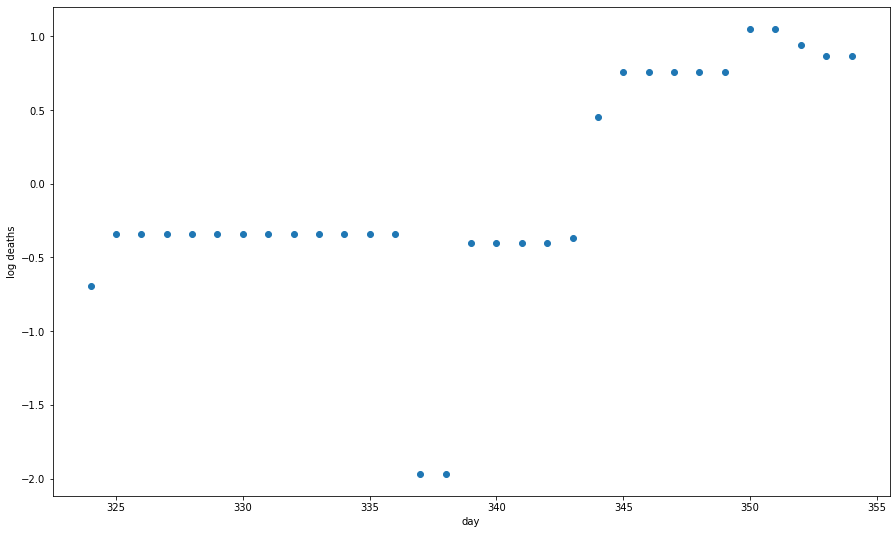

In [ ]:
get_r_county('Contra Costa', dt.datetime(2020, 11, 20), dt.datetime(2020, 12, 20))

0.986323641193075

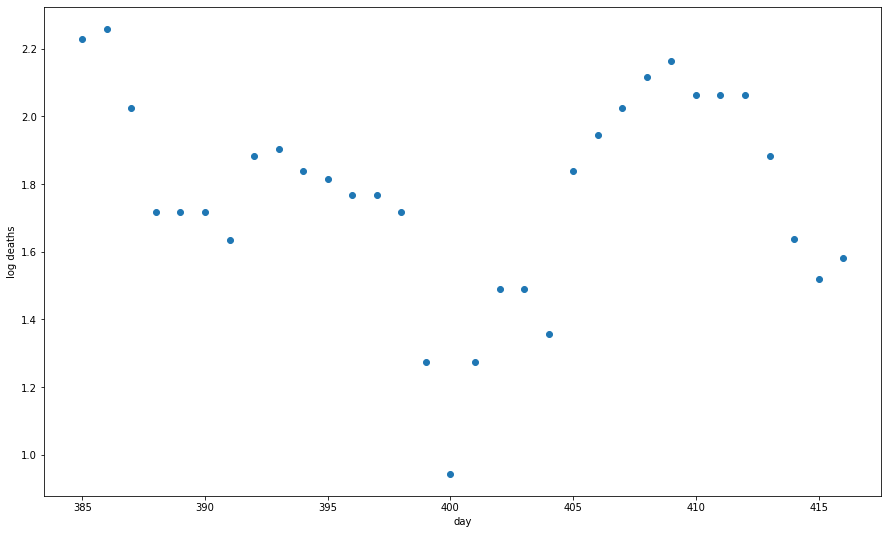

In [ ]:
get_r_county('Contra Costa', dt.datetime(2021, 1, 20), dt.datetime(2021, 2, 20))

In [ ]:
county_data_CC= county_data[county_data['county']== 'Contra Costa']
county_data_CC

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,day_index,log_deaths
490,2020-03-03,USA-06013,Contra Costa,California,1,0.14,0.01,0,0.00,0.00,62,-inf
529,2020-03-04,USA-06013,Contra Costa,California,0,0.14,0.01,0,0.00,0.00,63,-inf
578,2020-03-05,USA-06013,Contra Costa,California,0,0.14,0.01,0,0.00,0.00,64,-inf
651,2020-03-06,USA-06013,Contra Costa,California,3,0.57,0.05,0,0.00,0.00,65,-inf
746,2020-03-07,USA-06013,Contra Costa,California,0,0.57,0.05,0,0.00,0.00,66,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1116725,2021-12-09,USA-06013,Contra Costa,California,147,131.00,11.36,0,1.71,0.15,708,0.536493
1119975,2021-12-10,USA-06013,Contra Costa,California,112,122.29,10.60,3,0.71,0.06,709,-0.342490
1123225,2021-12-11,USA-06013,Contra Costa,California,0,122.29,10.60,0,0.71,0.06,710,-0.342490
1126475,2021-12-12,USA-06013,Contra Costa,California,0,122.29,10.60,0,0.71,0.06,711,-0.342490


## 2) Now for the free exploration
* Likely will require using `.merge`, some filtering, and some plotting
### Suggested question: What is the relationship between politics (voting results from the 2020 election), vaccination rates, and covid deaths since the start of the summer? We'll ask this question specifically at the county level in California.
One example of an additional thing to explore if you have extra time and want to dig deeper: also look at mask use (NYT data on mask use [here](https://github.com/nytimes/covid-19-data/tree/master/mask-use)). You can also come up with your own additional questions as you work with the data.

In [ ]:
#NOTE: We chose a different question altogether than we had said before, because all the datasets we looked at had the date formatted as an object, not datetime, so we kept getting errors when we tried to use the dt.datetime code to index through days.
# subsetting county_vax data by two counties of similar population size to compare total number of vaccines given according to brand per selected county

SC_county_data= county_vax[county_vax['county']== 'Santa Cruz']
Yolo_county_data= county_vax[county_vax['county']== 'Yolo']


In [ ]:
county_vax

,date,county,fips,population,doses_administered,new_doses_administered,pfizer_doses,new_pfizer_doses,moderna_doses,new_moderna_doses,...,new_jj_doses,partially_vaccinated,new_partially_vaccinated,at_least_one_dose,new_at_least_one_dose,fully_vaccinated,new_fully_vaccinated,partially_vaccinated_percent,at_least_one_dose_percent,fully_vaccinated_percent
0,2021-12-12,Alameda,1,1643700.0,2960412,2772,1835819.0,1035,905118.0,1059,...,36,104127.0,260,1368219.0,279,1264092.0,688,0.063349,0.832402,0.769053
1,2021-12-12,Alpine,3,1148.0,1759,0,61.0,0,1689.0,0,...,0,115.0,0,827.0,0,712.0,0,0.100174,0.720383,0.620209
2,2021-12-12,Amador,5,37829.0,48971,3,14236.0,0,32727.0,3,...,0,3607.0,1,23358.0,1,19751.0,0,0.095350,0.617463,0.522113
3,2021-12-12,Butte,7,227075.0,252538,81,124118.0,22,116372.0,42,...,3,10545.0,14,119222.0,17,108677.0,16,0.046438,0.525034,0.478595
4,2021-12-12,Calaveras,9,45235.0,56848,25,24124.0,12,30866.0,13,...,0,3816.0,4,26961.0,4,23145.0,2,0.084359,0.596021,0.511661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29227,2020-07-27,Tulare,107,460477.0,0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.000000,0.000000,0.000000
29228,2020-07-27,Tuolumne,109,53932.0,0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.000000,0.000000,0.000000
29229,2020-07-27,Ventura,111,848112.0,0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.000000,0.000000,0.000000
29230,2020-07-27,Yolo,113,214977.0,0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.000000,0.000000,0.000000


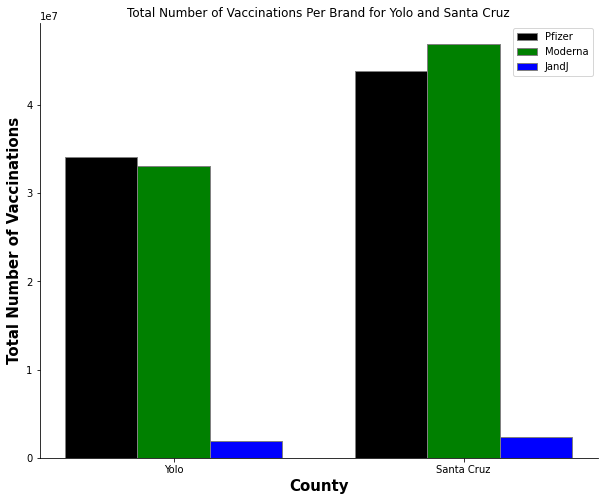

In [ ]:
# finds the sum of all doses per brand in the entire dataset per selected county (Yolo and Santa Cruz)
yp = sum(Yolo_county_data['pfizer_doses'])
ym = sum (Yolo_county_data['moderna_doses'])
yj = sum (Yolo_county_data['jj_doses'])

sp = sum(SC_county_data['pfizer_doses'])
sm = sum(SC_county_data['moderna_doses'])
sj = sum(SC_county_data['jj_doses'])

# Setting bar graph perameters
barWidth = 0.25
fig = plt.subplots(figsize =(10, 8))

# grouping county data for each brand together
Pfizer = [yp , sp]
Moderna = [ym , sm]
JandJ = [yj, sj]

# x-axis formatting
br1 = np.arange(len(Pfizer))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# bar features
plt.bar(br1, Pfizer, color ='k', width = barWidth, edgecolor ='grey', label ='Pfizer')
plt.bar(br2, Moderna, color ='g', width = barWidth, edgecolor ='grey', label ='Moderna')
plt.bar(br3, JandJ, color ='b', width = barWidth, edgecolor ='grey', label ='JandJ')

# X and Y-Axis Labels
plt.xlabel('County', fontweight ='bold', fontsize = 15)
plt.ylabel('Total Number of Vaccinations', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Pfizer))], ['Yolo', 'Santa Cruz'])

sns.despine()
plt.title('Total Number of Vaccinations Per Brand for Yolo and Santa Cruz')
plt.legend()
plt.show()


If you want to pursue an independent question, here are a few places to start looking for data:

* [LA Times covid data](https://github.com/datadesk/california-coronavirus-data)
* [New York Times covid data](https://github.com/nytimes/covid-19-data)
* [Our world in data (covid data)](https://github.com/owid/covid-19-data)
* [Our world in data (general worldwide datasets)](https://github.com/owid/owid-datasets/tree/master/datasets)
* [Datasets from dataopian](https://github.com/datasets)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e999e076-5053-4eb1-8404-3029f0617ea4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>